In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import itertools

pd.set_option('display.max_columns', 500)
sns.set(style="darkgrid")

five_color  = {1: "blue", 2: "blue", 3: "blue", 4: "blue", 5: "blue"}
four_color  = {1: "blue", 2: "blue", 3: "blue", 4: "blue"}
three_color = {1: "blue", 2: "blue", 3: "blue"}

# Survey Data #

## Quantitative Analysis

In [2]:
survey_data = pd.read_csv('../data/processed/survey_data.csv')
survey_data

,p_number,major,year,screen_size,num_items_impact_scale,num_items_impact_text,num_items_thoughts_scale,expression_scale,expression_text,request_scale,request_rationale,converse_scale,consverse_rationale,best_text,worst_text
0,1,Education,3,Small,4,"Some things needed to be typed, but there were...",1,4,The ease of usage enhanced my ability,5,"Anything that wasn't listed, could be typed so...",5,Easily used to express myself,How easy it is to use,"The automated voice, could be humanized a litt..."
1,2,Computer Science,5,Medium,5,I had trouble finding the basic structural wor...,2,3,A lot of regularly used words were on the main...,3,When asking for help I would only respond vagu...,3,I could use the tool but it would take way too...,When the category tabs had words inside of the...,There are too many images on the screen at one...
2,3,Education,4,Large,5,There were too many options. I would give up a...,2,2,Not being able to find what I wanted fast enou...,4,Help was easy to find,2,It takes a long time and people feel impatient,not have to use voice to communicate,hard to find options
3,4,Education,3,Small,1,The number of items on the screen only affecte...,1,4,My preconceptions of the app. I thought I was ...,5,I would be able to use this tool to make a req...,5,I would be able to use this tool to have a con...,The best thing about using the app to communic...,The worst thing about using the app is that I ...
4,5,Education,4,Medium,5,The number of items affected my ability becaus...,1,3,To me I wanted to make a full sentence so that...,5,I feel that asking help in general is a common...,4,If you knew in an advance what your conversati...,The pictures help give you an idea what it is ...,It takes an extremely long time trying to get ...
5,6,Computer Science,4,Large,5,"To many options on screen, I felt overwhelmed ...",2,2,What limited my thoughts was just knowledge of...,2,Requests such as going to the bathroom and ask...,1,Conversations are extremely fragmented. It is ...,It is better then using nothing or attempting ...,The entire thing feels almost unusable. Nothin...
6,7,Education,3,Small,3,There were not enough options toward school re...,1,4,The fact that when I was typing it said the le...,5,Because there was a help question and the key ...,4,"Yes, but there is a lot of typing that is need...",I think the folders was a really great idea to...,"There was too much typing, I think it needs mo..."
7,8,Computer Science,5,Medium,4,The number of items on any one screen felt app...,3,3,The lack of options as I drilled down into men...,3,I could certainly ask for help with simple tas...,3,"Yes, I'd be able to have a basic conversation,...",For me it took a lot longer than just typing a...,Not finding words that'd you'd expect to find ...
8,9,Computer Science,2,Large,4,It negatively affected my ability to communica...,2,2,"The color grouping was helpful, but sometimes ...",4,The help and question icons were clearly ident...,3,Some extraneous icons were either difficult to...,The color grouping on the main page.,Some of the organization of the quarter circle...
9,10,Education,3,Small,4,At times it felt like there were too many item...,3,3,Having the keyboard really enhanced my ability...,4,Yes for the most part I could use this tool to...,3,"I could have limited conversation, and it woul...",The best thing about using this app is being a...,It was frustrating when I was looking for a wo...


In [3]:
survey_likert = survey_data[["num_items_impact_scale", "num_items_thoughts_scale", "expression_scale", "request_scale", "converse_scale"]]
survey_likert.describe()

,num_items_impact_scale,num_items_thoughts_scale,expression_scale,request_scale,converse_scale
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,3.722222,2.000000,2.833333,3.944444,3.055556
std,1.127494,0.685994,0.707107,1.109967,1.109967
min,1.000000,1.000000,2.000000,1.000000,1.000000
25%,3.000000,2.000000,2.000000,4.000000,3.000000
50%,4.000000,2.000000,3.000000,4.000000,3.000000
75%,4.750000,2.000000,3.000000,5.000000,3.750000
max,5.000000,3.000000,4.000000,5.000000,5.000000


In [4]:
small_df = survey_data[survey_data["screen_size"] == "Small"]
med_df   = survey_data[survey_data["screen_size"] == "Medium"]
large_df = survey_data[survey_data["screen_size"] == "Large"]

In [5]:
small_likert = small_df[["num_items_impact_scale", "num_items_thoughts_scale", "expression_scale", "request_scale", "converse_scale"]]
small_likert.describe()

,num_items_impact_scale,num_items_thoughts_scale,expression_scale,request_scale,converse_scale
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,3.166667,1.833333,3.333333,4.666667,3.833333
std,1.471960,0.983192,0.816497,0.516398,0.983192
min,1.000000,1.000000,2.000000,4.000000,3.000000
25%,2.250000,1.000000,3.000000,4.250000,3.000000
50%,3.500000,1.500000,3.500000,5.000000,3.500000
75%,4.000000,2.750000,4.000000,5.000000,4.750000
max,5.000000,3.000000,4.000000,5.000000,5.000000


In [6]:
med_likert = med_df[["num_items_impact_scale", "num_items_thoughts_scale", "expression_scale", "request_scale", "converse_scale"]]
med_likert.describe()

,num_items_impact_scale,num_items_thoughts_scale,expression_scale,request_scale,converse_scale
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,4.000000,2.166667,2.833333,4.000000,3.000000
std,0.894427,0.752773,0.408248,0.894427,0.632456
min,3.000000,1.000000,2.000000,3.000000,2.000000
25%,3.250000,2.000000,3.000000,3.250000,3.000000
50%,4.000000,2.000000,3.000000,4.000000,3.000000
75%,4.750000,2.750000,3.000000,4.750000,3.000000
max,5.000000,3.000000,3.000000,5.000000,4.000000


In [7]:
large_likert = large_df[["num_items_impact_scale", "num_items_thoughts_scale", "expression_scale", "request_scale", "converse_scale"]]
large_likert.describe()

,num_items_impact_scale,num_items_thoughts_scale,expression_scale,request_scale,converse_scale
count,6.000000,6.0,6.000000,6.000000,6.000000
mean,4.000000,2.0,2.333333,3.166667,2.333333
std,0.894427,0.0,0.516398,1.329160,1.211060
min,3.000000,2.0,2.000000,1.000000,1.000000
25%,3.250000,2.0,2.000000,2.500000,1.250000
50%,4.000000,2.0,2.000000,4.000000,2.500000
75%,4.750000,2.0,2.750000,4.000000,3.000000
max,5.000000,2.0,3.000000,4.000000,4.000000


In [8]:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3886444/

for col in ["num_items_impact_scale", "num_items_thoughts_scale", "expression_scale", "request_scale", "converse_scale"]:
    print("Column:", col)
    print("\tSmall v Med:", stats.mannwhitneyu(small_likert[col], med_likert[col]))
    print("\tSmall v Large:", stats.mannwhitneyu(small_likert[col], large_likert[col]))
    print("\tMed v Large:", stats.mannwhitneyu(med_likert[col], large_likert[col]))

Column: num_items_impact_scale
	Small v Med: MannwhitneyuResult(statistic=12.0, pvalue=0.18146395694634748)
	Small v Large: MannwhitneyuResult(statistic=12.0, pvalue=0.18146395694634748)
	Med v Large: MannwhitneyuResult(statistic=18.0, pvalue=0.4662796025899057)
Column: num_items_thoughts_scale
	Small v Med: MannwhitneyuResult(statistic=14.0, pvalue=0.2767988142890202)
	Small v Large: MannwhitneyuResult(statistic=15.0, pvalue=0.3258738932410217)
	Med v Large: MannwhitneyuResult(statistic=15.0, pvalue=0.2990807263417641)
Column: expression_scale
	Small v Med: MannwhitneyuResult(statistic=10.5, pvalue=0.10316180584786055)
	Small v Large: MannwhitneyuResult(statistic=6.0, pvalue=0.024894582880524766)
	Med v Large: MannwhitneyuResult(statistic=9.0, pvalue=0.056097912042340055)
Column: request_scale
	Small v Med: MannwhitneyuResult(statistic=10.0, pvalue=0.09492701346973698)
	Small v Large: MannwhitneyuResult(statistic=4.0, pvalue=0.009263373646088374)
	Med v Large: MannwhitneyuResult(stati

In [9]:
cs_df = survey_data[survey_data["major"] == "Computer Science"]
ed_df = survey_data[survey_data["major"] == "Education"]

In [10]:
cs_likert = cs_df[["num_items_impact_scale", "num_items_thoughts_scale", "expression_scale", "request_scale", "converse_scale"]]
cs_likert.describe()

,num_items_impact_scale,num_items_thoughts_scale,expression_scale,request_scale,converse_scale
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,4.000000,2.333333,2.666667,3.333333,2.666667
std,0.894427,0.516398,0.516398,0.816497,0.816497
min,3.000000,2.000000,2.000000,2.000000,1.000000
25%,3.250000,2.000000,2.250000,3.000000,3.000000
50%,4.000000,2.000000,3.000000,3.500000,3.000000
75%,4.750000,2.750000,3.000000,4.000000,3.000000
max,5.000000,3.000000,3.000000,4.000000,3.000000


In [11]:
ed_likert = ed_df[["num_items_impact_scale", "num_items_thoughts_scale", "expression_scale", "request_scale", "converse_scale"]]
ed_likert.describe()

,num_items_impact_scale,num_items_thoughts_scale,expression_scale,request_scale,converse_scale
count,12.000000,12.000000,12.000000,12.00000,12.000000
mean,3.583333,1.833333,2.916667,4.25000,3.250000
std,1.240112,0.717741,0.792961,1.13818,1.215431
min,1.000000,1.000000,2.000000,1.00000,1.000000
25%,3.000000,1.000000,2.000000,4.00000,2.750000
50%,4.000000,2.000000,3.000000,4.50000,3.000000
75%,4.250000,2.000000,3.250000,5.00000,4.000000
max,5.000000,3.000000,4.000000,5.00000,5.000000


In [12]:
for col in ["num_items_impact_scale", "num_items_thoughts_scale", "expression_scale", "request_scale", "converse_scale"]:
    print("Column:", col)
    print("\t", stats.mannwhitneyu(cs_likert[col], ed_likert[col]))

Column: num_items_impact_scale
	 MannwhitneyuResult(statistic=30.0, pvalue=0.2958774942973801)
Column: num_items_thoughts_scale
	 MannwhitneyuResult(statistic=22.0, pvalue=0.07991019276045475)
Column: expression_scale
	 MannwhitneyuResult(statistic=30.0, pvalue=0.2865756161150541)
Column: request_scale
	 MannwhitneyuResult(statistic=13.5, pvalue=0.013857564087781197)
Column: converse_scale
	 MannwhitneyuResult(statistic=25.5, pvalue=0.15751118433219313)


### Visualizations ###

In [13]:
def gen_vis(df, col, index, bins, name, color):    
    plt.subplot(2, 3, index)
    plt.title(name)
    ax = sns.countplot(x=col, data=df, order=bins, palette=color)
    ax.set_ylim(0, 8)
    ax.set_xlabel("")
    
    if len(bins) == 3:
        plt.xticks(ticks=[0, 1, 2], labels=["Too few", "Appropriate", "Too many"])
    elif len(bins) == 4:
        plt.xticks(ticks=[0, 1, 2, 3], labels=["No thoughts", "Some thoughts", "Most thoughts", "All thoughts"])

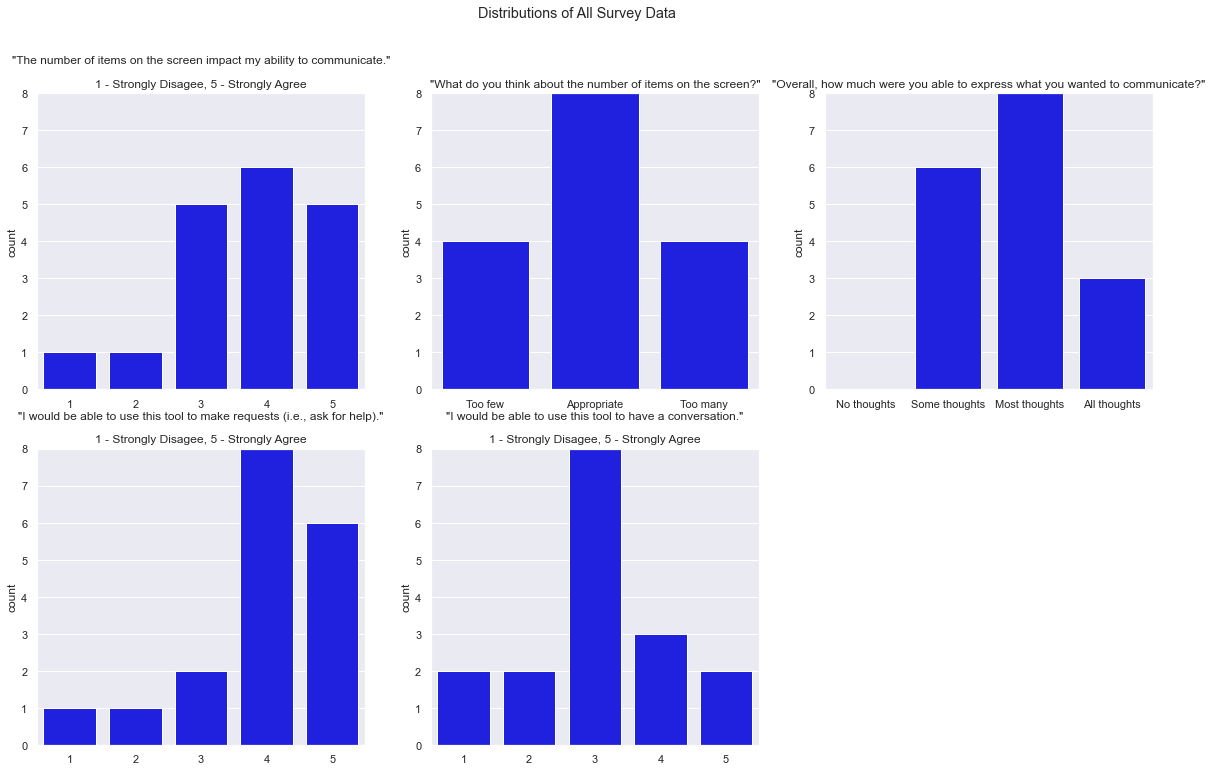

In [14]:
fig = plt.figure(figsize=(20.0, 12.0))
fig.suptitle("Distributions of All Survey Data")

gen_vis(df = survey_likert, col="num_items_impact_scale", index=1, bins=[1, 2, 3, 4, 5], name="\"The number of items on the screen impact my ability to communicate.\"\n\n1 - Strongly Disagee, 5 - Strongly Agree", color=five_color)
gen_vis(df = survey_likert, col="num_items_thoughts_scale", index=2, bins=[1, 2, 3], name="\"What do you think about the number of items on the screen?\"", color=three_color)
gen_vis(df = survey_likert, col="expression_scale", index=3, bins=[1, 2, 3, 4], name="\"Overall, how much were you able to express what you wanted to communicate?\"", color=four_color)
gen_vis(df = survey_likert, col="request_scale", index=4, bins=[1, 2, 3, 4, 5], name="\"I would be able to use this tool to make requests (i.e., ask for help).\"\n\n1 - Strongly Disagee, 5 - Strongly Agree", color=five_color)
gen_vis(df = survey_likert, col="converse_scale", index=5, bins=[1, 2, 3, 4, 5], name="\"I would be able to use this tool to have a conversation.\"\n\n1 - Strongly Disagee, 5 - Strongly Agree", color=five_color)

plt.savefig("../figures/survey_distributions_all.png", bbox_inches="tight")

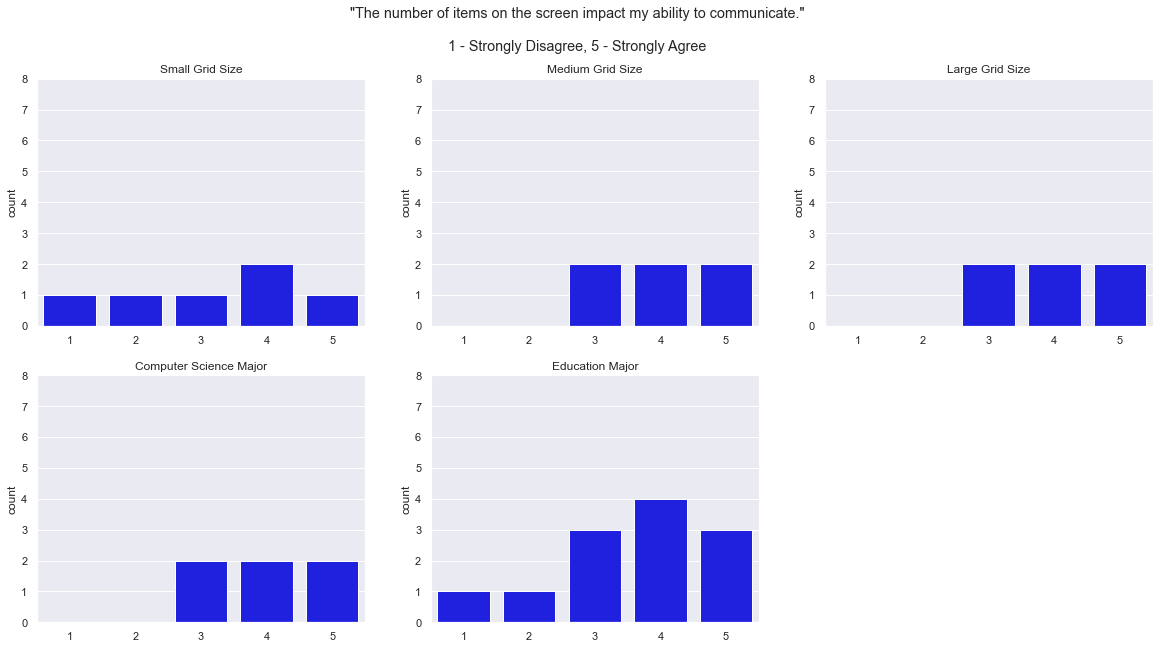

In [15]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("\"The number of items on the screen impact my ability to communicate.\"\n\n1 - Strongly Disagree, 5 - Strongly Agree")

bins = [1, 2, 3, 4, 5]

gen_vis(df=small_likert, col="num_items_impact_scale", index=1, bins=bins, name="Small Grid Size", color=five_color)
gen_vis(df=med_likert, col="num_items_impact_scale", index=2, bins=bins, name="Medium Grid Size", color=five_color)
gen_vis(df=large_likert, col="num_items_impact_scale", index=3, bins=bins, name="Large Grid Size", color=five_color)

gen_vis(df=cs_likert, col="num_items_impact_scale", index=4, bins=bins, name="Computer Science Major", color=five_color)
gen_vis(df=ed_likert, col="num_items_impact_scale", index=5, bins=bins, name="Education Major", color=five_color)
    
plt.savefig("../figures/num_items_impact_scale.png", bbox_inches="tight")

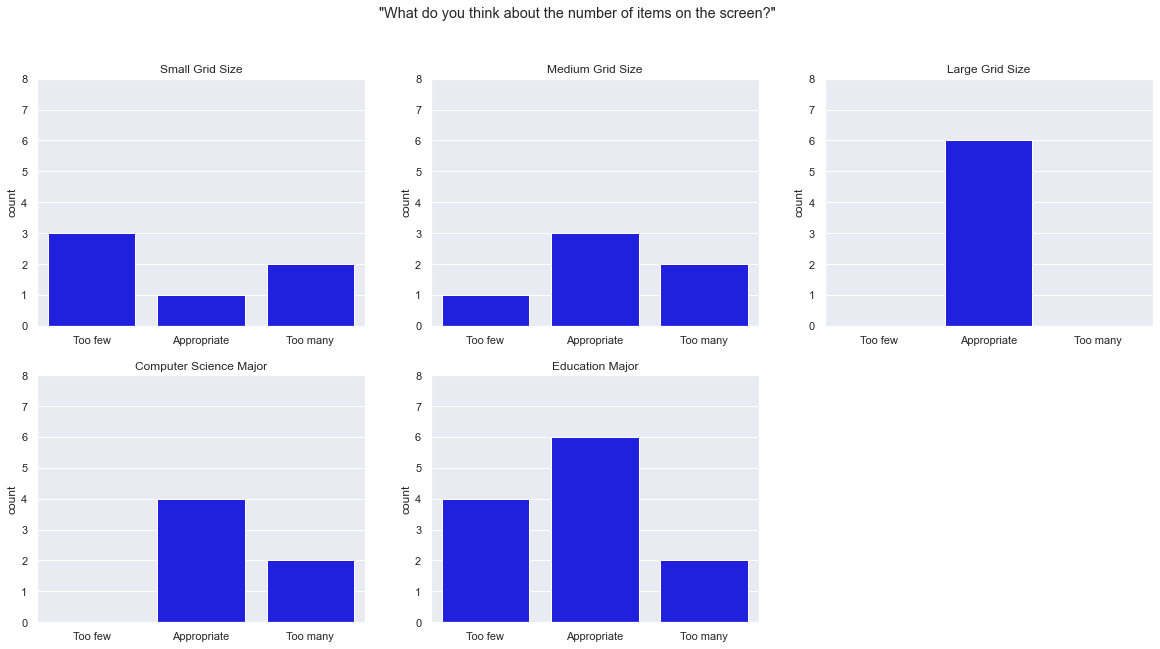

In [16]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("\"What do you think about the number of items on the screen?\"")

bins = [1, 2, 3]

gen_vis(df=small_likert, col="num_items_thoughts_scale", index=1, bins=bins, name="Small Grid Size", color=three_color)
gen_vis(df=med_likert, col="num_items_thoughts_scale", index=2, bins=bins, name="Medium Grid Size", color=three_color)
gen_vis(df=large_likert, col="num_items_thoughts_scale", index=3, bins=bins, name="Large Grid Size", color=three_color)

gen_vis(df=cs_likert, col="num_items_thoughts_scale", index=4, bins=bins, name="Computer Science Major", color=three_color)
gen_vis(df=ed_likert, col="num_items_thoughts_scale", index=5, bins=bins, name="Education Major", color=three_color)
    
plt.savefig("../figures/num_items_thoughts_scale.png", bbox_inches="tight")

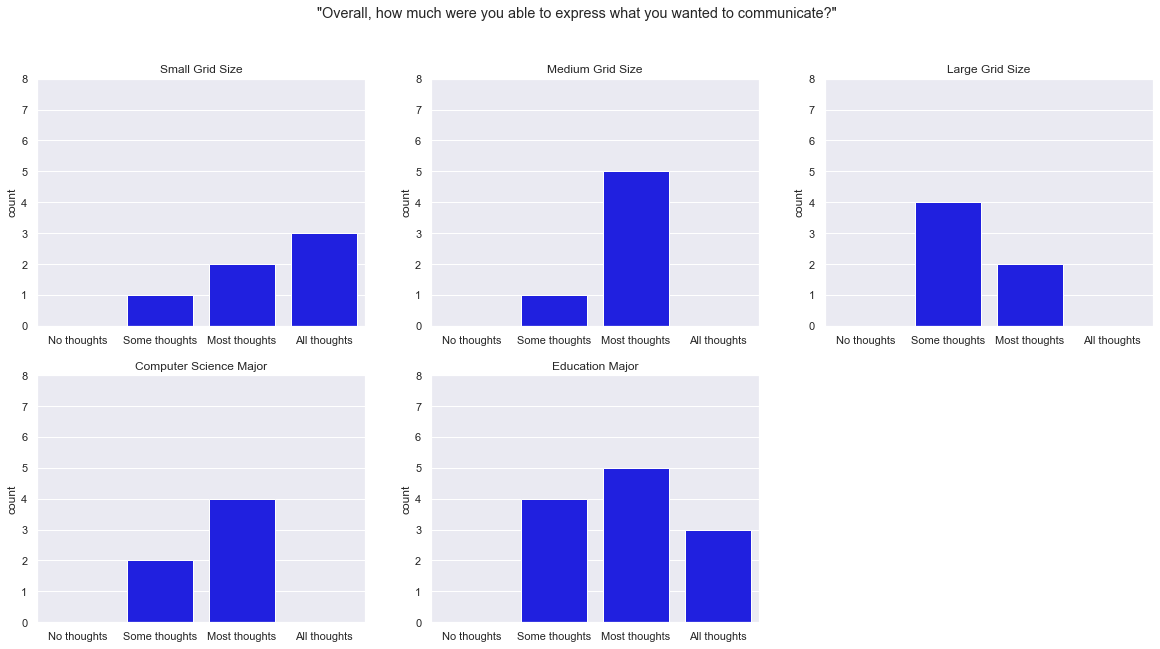

In [17]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("\"Overall, how much were you able to express what you wanted to communicate?\"")

bins = [1, 2, 3, 4]

gen_vis(df=small_likert, col="expression_scale", index=1, bins=bins, name="Small Grid Size", color=four_color)
gen_vis(df=med_likert, col="expression_scale", index=2, bins=bins, name="Medium Grid Size", color=four_color)
gen_vis(df=large_likert, col="expression_scale", index=3, bins=bins, name="Large Grid Size", color=four_color)

gen_vis(df=cs_likert, col="expression_scale", index=4, bins=bins, name="Computer Science Major", color=four_color)
gen_vis(df=ed_likert, col="expression_scale", index=5, bins=bins, name="Education Major", color=four_color)
    
plt.savefig("../figures/expression_scale.png", bbox_inches="tight")

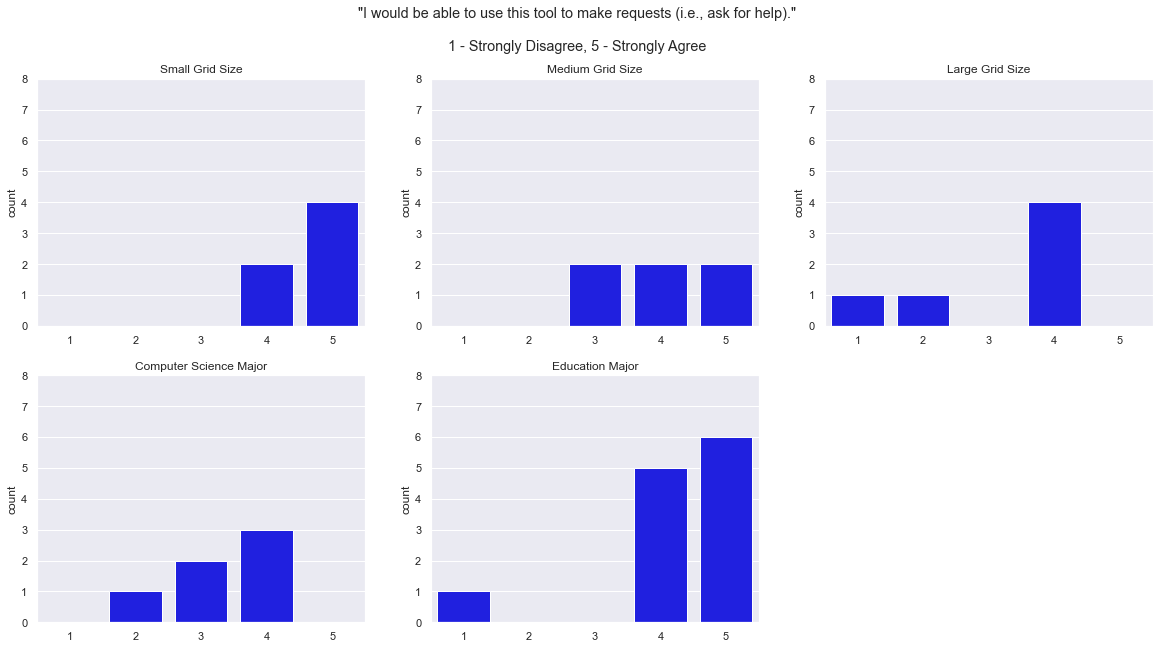

In [18]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("\"I would be able to use this tool to make requests (i.e., ask for help).\"\n\n1 - Strongly Disagree, 5 - Strongly Agree")

bins = [1, 2, 3, 4, 5]

gen_vis(df=small_likert, col="request_scale", index=1, bins=bins, name="Small Grid Size", color=five_color)
gen_vis(df=med_likert, col="request_scale", index=2, bins=bins, name="Medium Grid Size", color=five_color)
gen_vis(df=large_likert, col="request_scale", index=3, bins=bins, name="Large Grid Size", color=five_color)

gen_vis(df=cs_likert, col="request_scale", index=4, bins=bins, name="Computer Science Major", color=five_color)
gen_vis(df=ed_likert, col="request_scale", index=5, bins=bins, name="Education Major", color=five_color)
    
plt.savefig("../figures/request_scale.png", bbox_inches="tight")

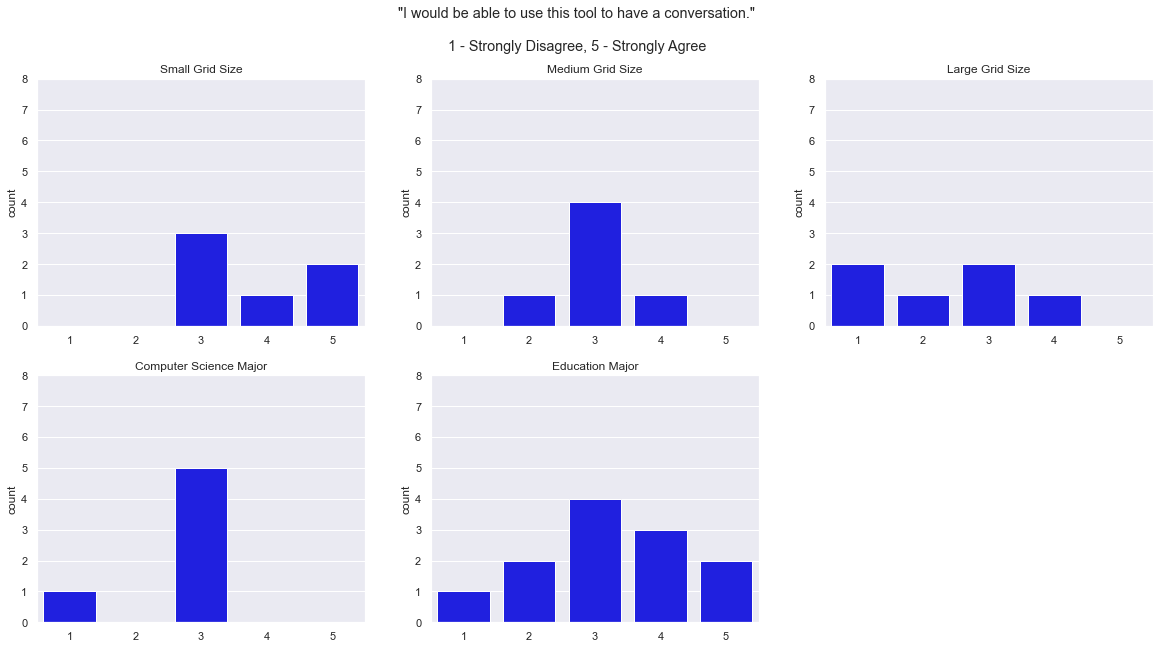

In [19]:
fig = plt.figure(figsize=(20.0, 10.0))
fig.suptitle("\"I would be able to use this tool to have a conversation.\"\n\n1 - Strongly Disagree, 5 - Strongly Agree")

bins = [1, 2, 3, 4, 5]

gen_vis(df=small_likert, col="converse_scale", index=1, bins=bins, name="Small Grid Size", color=five_color)
gen_vis(df=med_likert, col="converse_scale", index=2, bins=bins, name="Medium Grid Size", color=five_color)
gen_vis(df=large_likert, col="converse_scale", index=3, bins=bins, name="Large Grid Size", color=five_color)

gen_vis(df=cs_likert, col="converse_scale", index=4, bins=bins, name="Computer Science Major", color=five_color)
gen_vis(df=ed_likert, col="converse_scale", index=5, bins=bins, name="Education Major", color=five_color)
    
plt.savefig("../figures/converse_scale.png", bbox_inches="tight")

## Qualitative Analysis ##

In [20]:
small_comments = small_df[["num_items_impact_text", "expression_text", "request_rationale", "consverse_rationale", "best_text", "worst_text"]]
small_comments

,num_items_impact_text,expression_text,request_rationale,consverse_rationale,best_text,worst_text
0,"Some things needed to be typed, but there were...",The ease of usage enhanced my ability,"Anything that wasn't listed, could be typed so...",Easily used to express myself,How easy it is to use,"The automated voice, could be humanized a litt..."
3,The number of items on the screen only affecte...,My preconceptions of the app. I thought I was ...,I would be able to use this tool to make a req...,I would be able to use this tool to have a con...,The best thing about using the app to communic...,The worst thing about using the app is that I ...
6,There were not enough options toward school re...,The fact that when I was typing it said the le...,Because there was a help question and the key ...,"Yes, but there is a lot of typing that is need...",I think the folders was a really great idea to...,"There was too much typing, I think it needs mo..."
9,At times it felt like there were too many item...,Having the keyboard really enhanced my ability...,Yes for the most part I could use this tool to...,"I could have limited conversation, and it woul...",The best thing about using this app is being a...,It was frustrating when I was looking for a wo...
12,Sometimes I was not sure where to look for a c...,The Keyboard option was nice and when I couldn...,There are all the words needed to ask for help...,Some words needed for easy communication were ...,It is nice that you can use the buttons indivi...,Not knowing the location of small connecting w...
14,I was struggling trying to find the basic symb...,When asked specific questions based on my opin...,I agree because once I remembered the items it...,It took a long time for me to find these symbo...,"It is simple to use and very self explanitory,...",It is generic and at times was frustrating to ...


In [21]:
med_comments = med_df[["num_items_impact_text", "expression_text", "request_rationale", "consverse_rationale", "best_text", "worst_text"]]
med_comments

,num_items_impact_text,expression_text,request_rationale,consverse_rationale,best_text,worst_text
1,I had trouble finding the basic structural wor...,A lot of regularly used words were on the main...,When asking for help I would only respond vagu...,I could use the tool but it would take way too...,When the category tabs had words inside of the...,There are too many images on the screen at one...
4,The number of items affected my ability becaus...,To me I wanted to make a full sentence so that...,I feel that asking help in general is a common...,If you knew in an advance what your conversati...,The pictures help give you an idea what it is ...,It takes an extremely long time trying to get ...
7,The number of items on any one screen felt app...,The lack of options as I drilled down into men...,I could certainly ask for help with simple tas...,"Yes, I'd be able to have a basic conversation,...",For me it took a lot longer than just typing a...,Not finding words that'd you'd expect to find ...
10,"Since that's the first time using the tool, it...",I would take time to look around to see if the...,"even if you can't find the word you need, you ...","Personally, it communicating grow tedious afte...",It's relatively quick and the symbols help you...,Not being able to find your specific word can ...
16,My screen was large and I had to look around f...,I couldn’t use many words that make speech flo...,I could but not without difficulty asking for ...,I would have to get a lot faster or the keyboa...,The keyboard option.,Couldn’t find common use words.
17,"As a first time user, it was difficult to sift...",My incessant need to use prepositions and arti...,"With practice, I believe I could communicate m...","Again, with practice. However, if someone plop...",The keyboard feature allows literate persons t...,I don't know if it's a flaw so much as a neces...


In [22]:
large_comments = large_df[["num_items_impact_text", "expression_text", "request_rationale", "consverse_rationale", "best_text", "worst_text"]]
large_comments

,num_items_impact_text,expression_text,request_rationale,consverse_rationale,best_text,worst_text
2,There were too many options. I would give up a...,Not being able to find what I wanted fast enou...,Help was easy to find,It takes a long time and people feel impatient,not have to use voice to communicate,hard to find options
5,"To many options on screen, I felt overwhelmed ...",What limited my thoughts was just knowledge of...,Requests such as going to the bathroom and ask...,Conversations are extremely fragmented. It is ...,It is better then using nothing or attempting ...,The entire thing feels almost unusable. Nothin...
8,It negatively affected my ability to communica...,"The color grouping was helpful, but sometimes ...",The help and question icons were clearly ident...,Some extraneous icons were either difficult to...,The color grouping on the main page.,Some of the organization of the quarter circle...
11,It was challenging to find certain words or wo...,Putting the words/word categories in alphabeti...,It would take too long for me to communicate t...,It would take too long for me to be able to re...,The variety of words and word categories.,Difficulty navigating and finding words/word c...
13,There was a lot to look for. I think that if t...,It was hard for me to look at all of the items...,The help button was clear. Maybe there should ...,I like that you are able to type if you cant f...,I liked the photos that each icon had. I like ...,the different colors and the number of icons k...
15,A little overwhelming at the start,"Difficult to find exact words, had to manually...",Specific requests require typing but the gener...,"I am not used to the tool, but it is slow and ...",Pictures help with visually locating the relev...,My lack of knowledge of the tool and what woul...


In [23]:
cs_comments = cs_df[["num_items_impact_text", "expression_text", "request_rationale", "consverse_rationale", "best_text", "worst_text"]]
cs_comments

,num_items_impact_text,expression_text,request_rationale,consverse_rationale,best_text,worst_text
1,I had trouble finding the basic structural wor...,A lot of regularly used words were on the main...,When asking for help I would only respond vagu...,I could use the tool but it would take way too...,When the category tabs had words inside of the...,There are too many images on the screen at one...
5,"To many options on screen, I felt overwhelmed ...",What limited my thoughts was just knowledge of...,Requests such as going to the bathroom and ask...,Conversations are extremely fragmented. It is ...,It is better then using nothing or attempting ...,The entire thing feels almost unusable. Nothin...
7,The number of items on any one screen felt app...,The lack of options as I drilled down into men...,I could certainly ask for help with simple tas...,"Yes, I'd be able to have a basic conversation,...",For me it took a lot longer than just typing a...,Not finding words that'd you'd expect to find ...
8,It negatively affected my ability to communica...,"The color grouping was helpful, but sometimes ...",The help and question icons were clearly ident...,Some extraneous icons were either difficult to...,The color grouping on the main page.,Some of the organization of the quarter circle...
10,"Since that's the first time using the tool, it...",I would take time to look around to see if the...,"even if you can't find the word you need, you ...","Personally, it communicating grow tedious afte...",It's relatively quick and the symbols help you...,Not being able to find your specific word can ...
15,A little overwhelming at the start,"Difficult to find exact words, had to manually...",Specific requests require typing but the gener...,"I am not used to the tool, but it is slow and ...",Pictures help with visually locating the relev...,My lack of knowledge of the tool and what woul...


In [24]:
ed_comments = ed_df[["num_items_impact_text", "expression_text", "request_rationale", "consverse_rationale", "best_text", "worst_text"]]
ed_comments

,num_items_impact_text,expression_text,request_rationale,consverse_rationale,best_text,worst_text
0,"Some things needed to be typed, but there were...",The ease of usage enhanced my ability,"Anything that wasn't listed, could be typed so...",Easily used to express myself,How easy it is to use,"The automated voice, could be humanized a litt..."
2,There were too many options. I would give up a...,Not being able to find what I wanted fast enou...,Help was easy to find,It takes a long time and people feel impatient,not have to use voice to communicate,hard to find options
3,The number of items on the screen only affecte...,My preconceptions of the app. I thought I was ...,I would be able to use this tool to make a req...,I would be able to use this tool to have a con...,The best thing about using the app to communic...,The worst thing about using the app is that I ...
4,The number of items affected my ability becaus...,To me I wanted to make a full sentence so that...,I feel that asking help in general is a common...,If you knew in an advance what your conversati...,The pictures help give you an idea what it is ...,It takes an extremely long time trying to get ...
6,There were not enough options toward school re...,The fact that when I was typing it said the le...,Because there was a help question and the key ...,"Yes, but there is a lot of typing that is need...",I think the folders was a really great idea to...,"There was too much typing, I think it needs mo..."
9,At times it felt like there were too many item...,Having the keyboard really enhanced my ability...,Yes for the most part I could use this tool to...,"I could have limited conversation, and it woul...",The best thing about using this app is being a...,It was frustrating when I was looking for a wo...
11,It was challenging to find certain words or wo...,Putting the words/word categories in alphabeti...,It would take too long for me to communicate t...,It would take too long for me to be able to re...,The variety of words and word categories.,Difficulty navigating and finding words/word c...
12,Sometimes I was not sure where to look for a c...,The Keyboard option was nice and when I couldn...,There are all the words needed to ask for help...,Some words needed for easy communication were ...,It is nice that you can use the buttons indivi...,Not knowing the location of small connecting w...
13,There was a lot to look for. I think that if t...,It was hard for me to look at all of the items...,The help button was clear. Maybe there should ...,I like that you are able to type if you cant f...,I liked the photos that each icon had. I like ...,the different colors and the number of icons k...
14,I was struggling trying to find the basic symb...,When asked specific questions based on my opin...,I agree because once I remembered the items it...,It took a long time for me to find these symbo...,"It is simple to use and very self explanitory,...",It is generic and at times was frustrating to ...


In [25]:
small_comments.to_csv('../data/processed/comments_small.csv', index=False)
med_comments.to_csv('../data/processed/comments_med.csv', index=False)
large_comments.to_csv('../data/processed/comments_large.csv', index=False)
cs_comments.to_csv('../data/processed/comments_cs.csv', index=False)
ed_comments.to_csv('../data/processed/comments_ed.csv', index=False)